## Q1. Describe the decision tree classifier algorithm and how it works to make predictions.

Ans-A Decision Tree is a supervised Machine learning algorithm. It is used in both classification and regression algorithms. The decision tree is like a tree with nodes. The branches depend on a number of factors. It splits data into branches like these till it achieves a threshold value. A decision tree consists of the root nodes, children nodes, and leaf nodes.

Let’s Understand the decision tree methods by Taking one Real-life Scenario

Imagine that you play football every Sunday and you always invite your friend to come to play with you. Sometimes your friend actually comes and sometimes he doesn’t.

The factor on whether or not to come depends on numerous things, like weather, temperature, wind, and fatigue. We start to take all of these features into consideration and begin tracking them alongside your friend’s decision whether to come for playing or not.

You can use this data to predict whether or not your friend will come to play football or not. The technique you could use is a decision tree. Here’s what the decision tree would look like after implementation:
2. Elements Of a Decision Tree
Every decision tree consists following list of elements:

a Node

b Edges

c Root

d Leaves

a) Nodes: It is The point where the tree splits according to the value of some attribute/feature of the dataset

b) Edges: It directs the outcome of a split to the next node we can see in the figure above that there are nodes for features like outlook, humidity and windy. There is an edge for each potential value of each of those attributes/features.

c) Root: This is the node where the first split takes place

d) Leaves: These are the terminal nodes that predict the outcome of the decision tree

3. How to Build Decision Trees from Scratch
While building a Decision tree, the main thing is to select the best attribute from the total features list of the dataset for the root node as well as for sub-nodes. The selection of best attributes is being achieved with the help of a technique known as the Attribute selection measure (ASM).

With the help of ASM, we can easily select the best features for the respective nodes of the decision tree.

There are two techniques for ASM:

a) Information Gain

b) Gini Index

a) Information Gain:
1 Information gain is the measurement of changes in entropy value after the splitting/segmentation of the dataset based on an attribute.

2 It tells how much information a feature/attribute provides us.

3 Following the value of the information gain, splitting of the node and decision tree building is being done.

4 decision tree always tries to maximize the value of the information gain, and a node/attribute having the highest value of the information gain is being split first. Information gain can be calculated using the below formula:

Information Gain= Entropy(S)-  (Weighted Avg) *Entropy(each feature)

Entropy: Entropy signifies the randomness in the dataset. It is being defined as a metric to measure impurity. Entropy can be calculated as:

Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)

Where,

S= Total number of samples

P(yes)= probability of yes

P(no)= probability of no.

b) Gini Index:
Gini index is also being defined as a measure of impurity/ purity used while creating a decision tree in the CART(known as Classification and Regression Tree) algorithm.

An attribute having a low Gini index value should be preferred in contrast to the high Gini index value.

It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

Gini index can be calculated using the below formula:

Gini Index= 1- ∑jPj2

Where pj stands for the probability

4. How Does the Decision Tree Algorithm works
The basic idea behind any decision tree algorithm is as follows:

1. Select the best Feature using Attribute Selection Measures(ASM) to split the records.

2. Make that attribute/feature a decision node and break the dataset into smaller subsets.

3 Start the tree-building process by repeating this process recursively for each child until one of the following condition is being achieved :

a) All tuples belonging to the same attribute value.

b) There are no more of the attributes remaining.

c ) There are no more instances remaining.



## Q2. Provide a step-by-step explanation of the mathematical intuition behind decision tree classification.

Ans-

## Decision Tree Classifier Implementation with Post Prunning and preprunning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris

In [4]:
dataset=load_iris()

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
import seaborn as sns
df=sns.load_dataset('iris')

In [7]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Independent and dependent features
X=df.iloc[:,:-1]
y=dataset.target

In [16]:
### train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier=DecisionTreeClassifier(criterion='entropy')

In [19]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

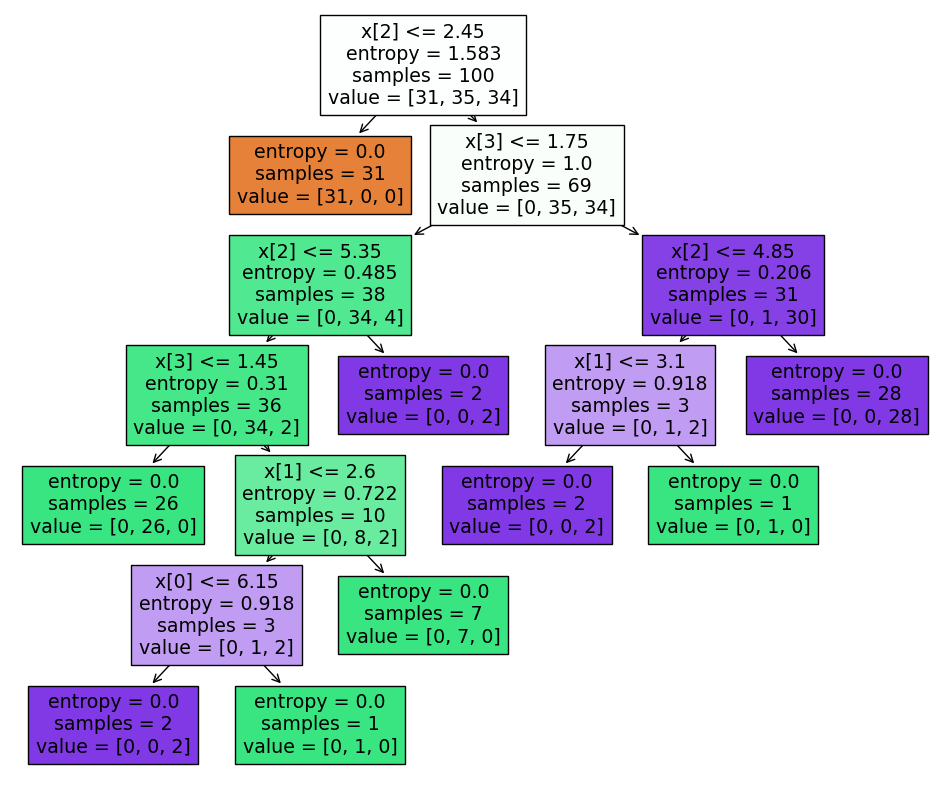

In [24]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)           

In [25]:
## Post prinning
Classifier=DecisionTreeClassifier(criterion='entropy',max_depth=2)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4444444444444444, 0.9285714285714286, 'x[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

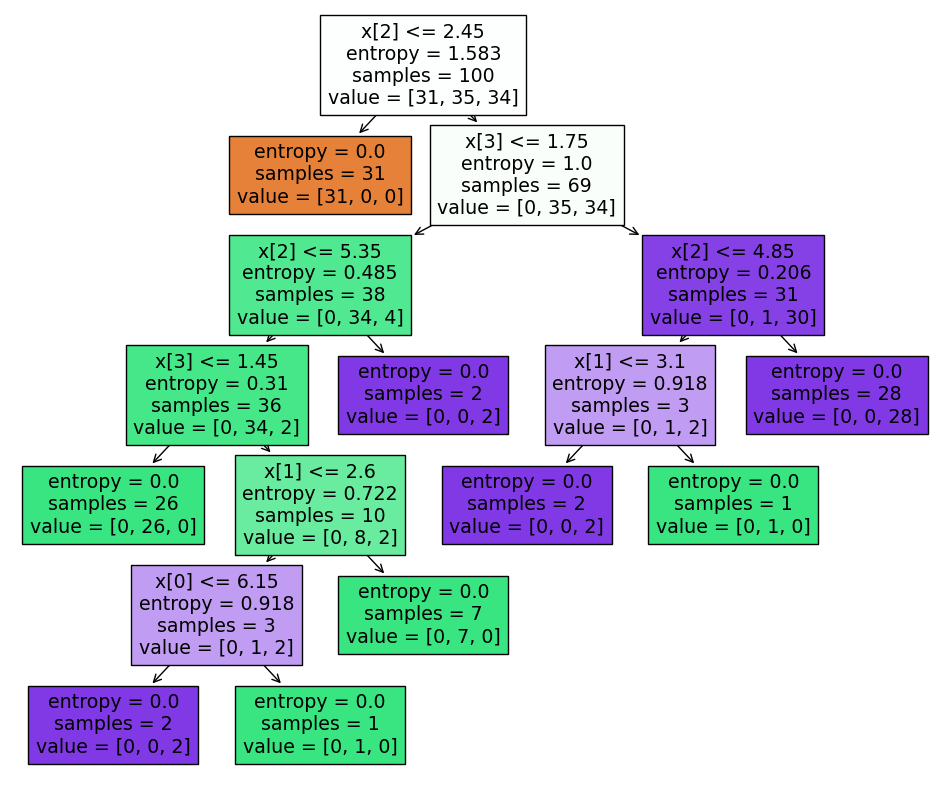

In [26]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(classifier,filled=True)

In [27]:
## prediction
y_pred=Classifier.predict(X_test)

In [28]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [32]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)


0.98


In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Q3. Explain how a decision tree classifier can be used to solve a binary classification problem.

## Q4. Discuss the geometric intuition behind decision tree classification and how it can be used to make predictions.

Ans-DECISION TREE
 A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.



Geometrically we see that the decision boundaries are axis parallel & have a decision surface for each leaf node (Yi).
Decision trees tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. There are two stages to prediction.

## Q5. Define the confusion matrix and describe how it can be used to evaluate the performance of a classification model.

Ans-A confusion matrix is a table that allows you to visualize the performance of a classification model. You can also use the information in it to calculate measures that can help you determine the usefulness of the model. Rows represent predicted classifications, while columns represent the true classes from the data.

## DecisionTree Prepruning And Hyperparameter Tuning For Huge Data

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [38]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [40]:
y_pred=clf.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.84
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.53      0.89      0.67         9
           2       0.94      0.68      0.79        22

    accuracy                           0.84        50
   macro avg       0.82      0.86      0.82        50
weighted avg       0.89      0.84      0.85        50



## Q6. Provide an example of a confusion matrix and explain how precision, recall, and F1 score can be calculated from it.

#Train the decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
 

#Measure the performance of the decision tree model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))


In [43]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750


In [45]:
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.677


In [46]:
# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.900


In [47]:
# calculates recall for 1:1:100 dataset with 77tp,23fn and 95tp,5fn
from sklearn.metrics import recall_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(23)] + [1 for _ in range(77)]
pred_pos2 = [0 for _ in range(5)] + [2 for _ in range(95)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.860


Precision vs. Recall for Imbalanced Classification
You may decide to use precision or recall on your imbalanced classification problem.

Maximizing precision will minimize the number false positives, whereas maximizing the recall will minimize the number of false negatives.

Precision: Appropriate when minimizing false positives is the focus.
Recall: Appropriate when minimizing false negatives is the focus.
Sometimes, we want excellent predictions of the positive class. We want high precision and high recall.

This can be challenging, as often increases in recall often come at the expense of decreases in precision.

In imbalanced datasets, the goal is to improve recall without hurting precision. These goals, however, are often conflicting, since in order to increase the TP for the minority class, the number of FP is also often increased, resulting in reduced precision.

In [48]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


## Q7. Discuss the importance of choosing an appropriate evaluation metric for a classification problem and explain how this can be done.

## Q8. Provide an example of a classification problem where precision is the most important metric, and explain why.

## Q9. Provide an example of a classification problem where recall is the most important metric, and explain why.

Ans-7,8,9 
LETS DEEP DIVE INTO CONCEPTS THROUGH CASE STUDY
In these COVID times, people are often traveling from one place to another. The airport can be a risk as passengers wait in queues, check-in for flights, visit food vendors, and use facilities such as bathrooms. Tracking COVID positive passengers at airports can help prevent the spread of the virus.

Consider, we have a machine learning model classifying passengers as COVID positive and negative. When performing classification predictions, there are four types of outcomes that could occur:

True Positive (TP): When you predict an observation belongs to a class and it actually does belong to that class. In this case, a passenger who is classified as COVID positive and is actually positive.

True Negative (TN): When you predict an observation does not belong to a class and it actually does not belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually not COVID positive (negative).

False Positive (FP): When you predict an observation belongs to a class and it actually does not belong to that class. In this case, a passenger who is classified as COVID positive and is actually not COVID positive (negative).

False Negative(FN): When you predict an observation does not belong to a class and it actually does belong to that class. In this case, a passenger who is classified as not COVID positive (negative) and is actually COVID positive.


Confusion Matrix
For better visualization of the performance of a model, these four outcomes are plotted on a confusion matrix.



               ACTUAL
            Positive    Negative   
  Positive       TP           FP
  Negative       FN           TN

Accuracy
Yes! You got that right, we want our model to focus on True positive and True Negative. Accuracy is one metric which gives the fraction of predictions our model got right. Formally, accuracy has the following definition:

Accuracy = Number of correct predictions / Total number of predictions.

Evaluation Metrics      TP + TN/TP+FP+FN+TP

Now, let’s consider 50,000 passengers travel per day on an average. Out of which, 10 are actually COVID positive.

One of the easy ways to increase accuracy is to classify every passenger as COVID negative. So our confusion matrix looks like:

Accuracy for this case will be:

Accuracy = 49,990/50,000 = 0.9998 or 99.98%

For this particular example where we are trying to label passengers as COVID positive and negative with the hope of identifying the right ones, I can get 99.98% accuracy by simply labeling everyone as COVID negative. Obviously, this is a way more accuracy than we have ever seen in any model. But it doesn’t solve the purpose. The purpose here is to identify COVID positive passengers. Not labeling 10 of actually positive is a lot more expensive in this scenario. Accuracy in this context is a terrible measure because its easy to get extremely good accuracy but that’s not what we are interested in.

So in this context accuracy is not a good measure to evaluate a model. Let’s look at a very popular measure called Recall


Recall (Sensitivity or True positive rate)
Recall gives the fraction you correctly identified as positive out of all positives.
  Recall = TP/TP+FN
  
Now, this is an important measure. Out of all positive passengers what fraction you identified correctly. Going back to our previous strategy of labeling every passenger as negative that will give recall of Zero.

Recall = 0/10 = 0

So, in this context, Recall is a good measure. It says that the terrible strategy of identifying every passenger as COVID negative leads to zero recall. And we want to maximize the recall. 
To answer the above question, consider another scenario of labeling every passenger as COVID positive. Everybody walks into the airport and the model just labels them as positive. Labeling every passenger as positive is bad in terms of the amount of cost that needs to be spent in actually investigating each one before they board the flight.

The confusion matrix will look like:
Precision comes out to be: 1/ (1 + 0) = 1

Precision value is good in this case but let’s check for recall value once:

Recall = 1 / (1 + 9) = 0.1

Precision value is good in this context but recall value is low.

Scenario	Accuracy	Recall	Precision
Classifying all the passengers as –ve	High	Low	Low
Classifying all the passengers as positive	Low	High	Low
Classifying passengers with max. probability as positive	High	Low	Low
 

In some cases, we are pretty sure that we want to maximize either recall or precision at the cost of others. As in this case of labeling passengers, we really want to get the predictions right for COVID positive passengers because it is really expensive to not predict the passenger right as allowing COVID positive person to proceed will result in increasing the spread. So we are more interested in recall here.

Unfortunately, you can’t have it both ways: increasing precision reduces recall and vice versa. This is called precision/recall tradeoff.

Precision-Recall Tradeoff   
Some Classification models output the probabilities between 0 and 1. In our case of classifying passengers as COVID positive and negative, where we want to avoid missing actual cases of positive.  In particular, if a passenger is actually positive but our model fails to identify it, that would be very bad because there is a high chance that the virus can be spread by allowing these passengers to board the flight. So, we can’t take the risk of labeling passengers as negative even with a small doubt of having COVID.

So we strategize in such a way that if the output probability is greater than 0.3, we label them as COVID positive.



This results in higher recall and lower precision.

Consider the opposite of this, where we want to classify the passenger as positive when we are sure that the passenger is positive. We set the probability threshold as 0.9 that is classifying passenger as positive when the probability is greater than or equal to 0.9 otherwise negative.



So in general for most classifiers, there is going to be a trade-off between recall and precision as you vary the probability threshold.



If you need to compare different models with different precision-recall value, It is often convenient to combine precision and recall into a single metric. Correct!! We need a metric that considers both recall and precision to compute the performance.

 

F1 Score
It is defined as the harmonic mean of the model’s precision and recall.
      F1 Score = 2* Prescision * Recall/Precision +Recall



You must be wondering why Harmonic mean and not simple average? You’re heading in the right direction.

We use Harmonic mean because it is not sensitive to extremely large values, unlike simple averages. Say, we have a model with a precision of 1, and recall of 0 gives a simple average as 0.5 and an F1 score of 0. If one of the parameters is low, the second one no longer matters in the F1 score. The F1 score favors classifiers that have similar precision and recall. Thus, the F1 score is a better measure to use if you are seeking a balance between Precision and Recall.

ROC/AUC Curve
 The receiver operator characteristic is another common tool used for evaluation. It plots out the sensitivity and specificity for every possible decision rule cutoff between 0 and 1 for a model. For classification problems with probability outputs, a threshold can convert probability outputs to classifications. we get the ability to control the confusion matrix a little bit. So by changing the threshold, some of the numbers can be changed in the confusion matrix. But the most important question here is, how to find the right threshold? Of course, we don’t want to look at the confusion matrix every time the threshold is changed, therefore here comes the use of the ROC curve.

For each possible threshold, the ROC curve plots the False positive rate versus the true positive rate.

False Positive Rate: Fraction of negative instances that are incorrectly classified as positive.

True Positive Rate: Fraction of positive instances that are correctly predicted as positive.

Now, think about having a low threshold. So amongst all the probabilities arranged in ascending order, everything below bad is considered as negative and everything above 0.1 is considered as positive. By choosing this, you’re being very liberal.